In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('ex5data1.mat')

X=mat["X"] #12 x 1
y=mat["y"] #12 X 1

#test set

X_test=mat["Xtest"] #21 X 1
y_test=mat["ytest"] #21 x 1

#cross validation set

X_val=mat["Xval"] #21 x 1
y_val=mat["yval"] #21 x 1

(0.0, 40.0)

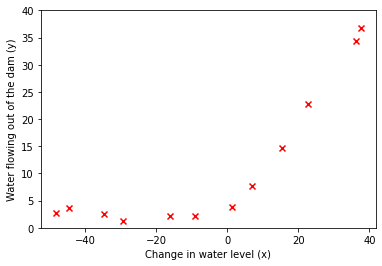

In [3]:
plt.scatter(X, y, marker = 'x', color = "red")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.ylim(0, 40)

In [4]:
def reg_linear_regression(X, y, theta, lbda):

    M = len(y)

    hypothesis = np.dot(X, theta)
    errors = hypothesis - y

    j = np.sum(errors**2)/(2*M)
    reg = lbda/(2*M) * np.sum(theta[1:]**2)
    J = j + reg

    grad_temp = 1/M * np.dot(X.T, errors)
    grad_reg = grad_temp + lbda/M * theta

    grad = np.vstack((grad_temp[0], grad_reg[1:]))

    return J, grad

In [5]:
def gradient_descent(X, y, theta, alpha, iters, lbda):

    J_h = []
    for i in range(iters):
        J, grad = reg_linear_regression(X, y, theta, lbda)
        theta = theta - (alpha*grad)

        J_h.append(J)

    return theta, J_h

In [7]:
Lambda = 0
M = len(y)
X_1 = np.hstack((np.ones((M,1)),X))
theta, J_history = gradient_descent(X_1, y, np.zeros((2,1)), 0.001, 4000, Lambda)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

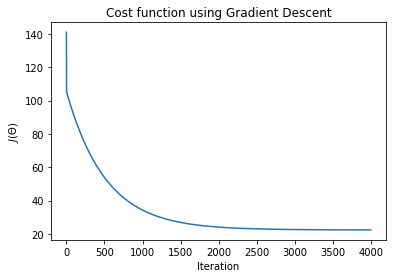

In [8]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

(-50.0, 40.0)

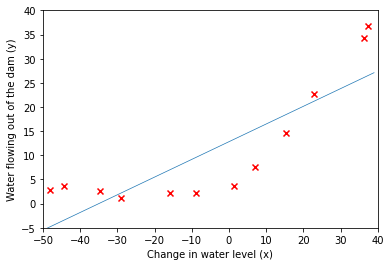

In [67]:
plt.scatter(X, y, marker = 'x', color = "red")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.ylim(0, 40)

x_value = [x for x in range (-50, 40)]
y_value = [y*theta[1] + theta[0] for y in x_value]
plt.plot(x_value, y_value, linewidth = 0.7)

plt.ylim(-5,40)
plt.xlim(-50,40)

In [10]:
def learning_curve(X, y, Xval, yval, lbda):
    
    M = len(y)
    error_train, error_cv = [], []

    for i in range(1,M+1):
        theta = gradient_descent(X[0:i,:], y[0:i,:], np.zeros((X.shape[1], 1)), 0.001, 3000, lbda)[0]

        error_train.append(reg_linear_regression(X[0:i,:], y[0:i,:], theta, lbda)[0])
        error_cv.append(reg_linear_regression(Xval, yval, theta, lbda)[0])

    return error_train, error_cv

In [15]:
Xval_1 = np.hstack((np.ones((21,1)),X_val))
error_train, error_val = learning_curve(X_1, y, Xval_1, y_val, Lambda)

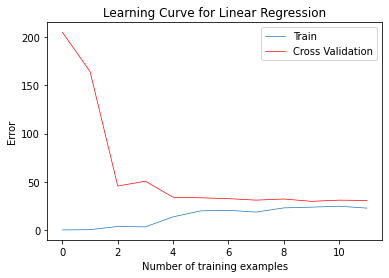

In [66]:
plt.plot(error_train,label="Train", linewidth = 0.7)
plt.plot(error_val,label="Cross Validation", color="r", linewidth = 0.7)
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [17]:
def polyFeatures(X, p):
    
    for i in range(2, p+1):
        X = np.hstack((X, (X[:,0]**i)[:,np.newaxis]))
        
    return X

In [19]:
def feature_normalization(X):

    X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
    
    return X

In [29]:
# Map X -> Polynomial Features + Normalize
p=8
X_p = polyFeatures(X, p)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()

X_p = sc_X.fit_transform(X_p)
X_p = np.hstack((np.ones((X_p.shape[0],1)),X_p))

In [32]:
# Map X_test -> Polynomial Features + Normalize
X_p_test = polyFeatures(X_test, p)
X_p_test = sc_X.transform(X_p_test)
X_p_test = np.hstack((np.ones((X_p_test.shape[0],1)),X_p_test))

In [1]:
# Map Xval -> Polynomial Features + Normalize
X_p_val = polyFeatures(X_val, p)
X_p_val = sc_X.transform(X_p_val)
X_p_val = np.hstack((np.ones((X_p_val.shape[0],1)),X_p_val))

NameError: name 'polyFeatures' is not defined

In [38]:
theta_p, J_h_p = gradient_descent(X_p, y, np.zeros((9,1)), 0.3, 20000, Lambda) 

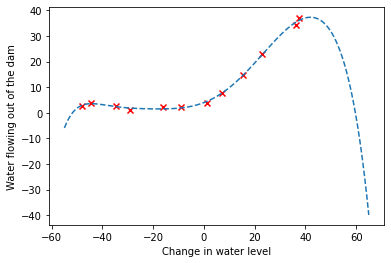

In [54]:
plt.scatter(X, y, marker="x", color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
X_value = np.linspace(-55,65,3575)

X_plot = polyFeatures(X_value[:,np.newaxis], p)
X_plot = sc_X.transform(X_plot)
X_plot = np.hstack((np.ones((X_plot.shape[0],1)),X_plot))
y_value= X_plot @ theta_p
plt.plot(X_value, y_value,"--")

In [43]:
error1_train, error1_val = learning_curve(X_p, y, X_p_val, y_val, Lambda)

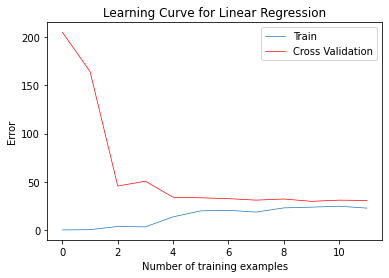

In [65]:
plt.plot(error_train,label="Train", linewidth = 0.7)
plt.plot(error_val,label="Cross Validation", color="r", linewidth = 0.7)
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [45]:
theta_p1, J_h_p1 = gradient_descent(X_p, y, np.zeros((9,1)), 0.01, 20000, 100) 

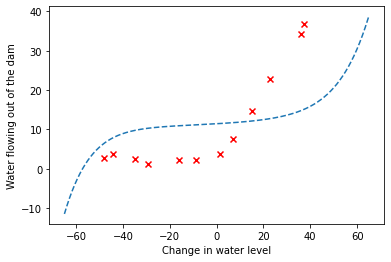

In [51]:
plt.scatter(X, y, marker = 'x', color = 'r')
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")

X_curve = np.linspace(-65, 65, 4225)

X_plot = polyFeatures(X_curve[:, np.newaxis], p)
X_plot = sc_X.transform(X_plot)

X_plot = np.hstack((np.ones((X_plot.shape[0],1)), X_plot))
Y_curve = np.dot(X_plot, theta_p1)

plt.plot(X_curve, Y_curve, "--")

In [56]:
error2_train, error2_val = learning_curve(X_p, y, X_p_val, y_val, 100)

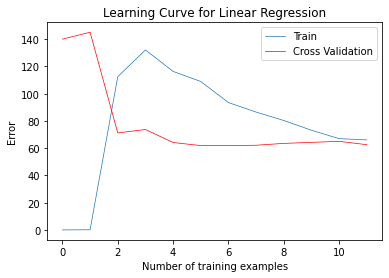

In [64]:
plt.plot(error2_train,label="Train", linewidth = 0.7)
plt.plot(error2_val,label="Cross Validation", color="r", linewidth = 0.7)
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()